# In-Class Activity: Linear Motion

In this activity, we'll be using sensory data you collect on your phone with either PhyPhox or Physics Toolbox. With the linear accelerometer, we'll measure the motion of our phone, and then use it to calculate the displacement (distance) of an object.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [72]:
# Import the csv file as a data frame

In [2]:
df = pd.read_csv("door-Olin120.csv")

In [74]:
# Examine the data frame -- how many rows and columns?
# What does each column contain?

# Use .describe to examine the columns

In [12]:
df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z
0,0.003032,-0.0719,0.0377,-0.0872,0.119,-0.082216
1,0.016690,0.0533,-0.0419,0.0194,0.070,0.024384
2,0.035564,0.0247,-0.0159,-0.0166,0.034,-0.011616
3,0.056252,0.0367,-0.0212,-0.0014,0.042,0.003584
4,0.073320,0.0388,-0.0187,-0.0061,0.043,-0.001116
...,...,...,...,...,...,...
516,9.834454,-0.1429,0.1964,-2.2903,2.303,-2.285316
517,9.851488,-0.1381,-0.1726,-0.2983,0.371,-0.293316
518,9.872237,-0.0541,-0.3362,0.6273,0.714,0.632284
519,9.889914,-0.0153,-0.1593,0.6633,0.682,0.668284


In [13]:
df.describe()

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,4.955956,-0.169857,-0.316279,-0.024232,1.693536,-0.019248
std,2.870542,1.584293,0.839367,2.276939,2.378047,2.276939
min,0.003032,-11.114300,-5.744800,-6.393000,0.027000,-6.388016
25%,2.478084,-0.267800,-0.453200,-0.096500,0.052000,-0.091516
50%,4.957098,-0.104700,-0.207700,-0.005100,0.450000,-0.000116
75%,7.437270,0.035600,-0.021900,0.040800,2.585000,0.045784
max,9.909383,8.165200,2.985900,19.579000,23.235000,19.583984


In [78]:
# Let's make some plots of the data

# We can use .plot to show all of the columns

# What is happening with each one?

<Axes: >

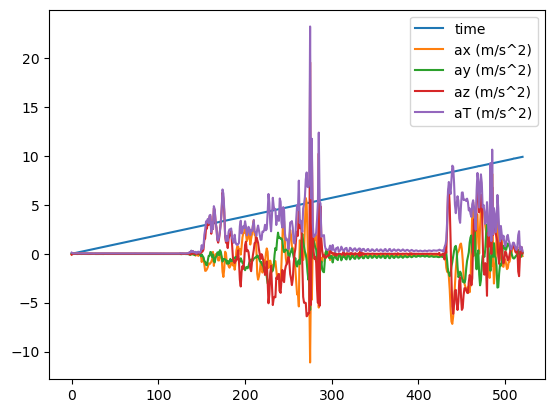

In [5]:
df.plot()

In [80]:
# Or we can look at individual columns...
# First let's look at the z acceleration

<Axes: >

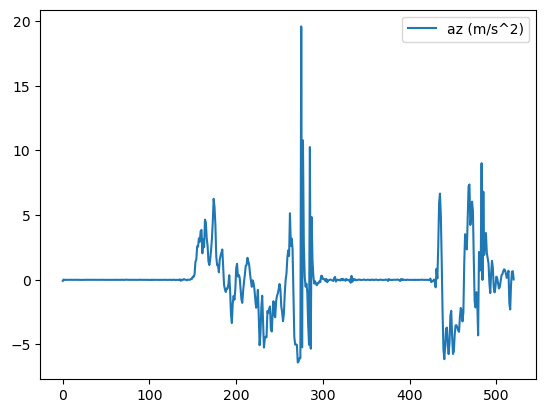

In [14]:
df.plot(y="az (m/s^2)")
#df.plot(y="ay (m/s^2)")
#df.plot(y="ax (m/s^2)")

In [87]:
# How many points of data before it starts to move?

In [ ]:
# Notice how it *seems* to start to 0... but it's a good practice to calibrate our sensor
# We can do this by calculating the baseline and subtracting it out

# First we calculate the z baseline by averaging the first 100 rows of data
# Remember how to select rows? We use .iloc

In [15]:
z_baseline = df["az (m/s^2)"].iloc[:100].mean()
z_baseline

-0.0049840000000000014

In [ ]:
# Now let's make a new column where we substract out the baseline

In [16]:
df["accel_z"] = df["az (m/s^2)"] - z_baseline
df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z
0,0.003032,-0.0719,0.0377,-0.0872,0.119,-0.082216
1,0.016690,0.0533,-0.0419,0.0194,0.070,0.024384
2,0.035564,0.0247,-0.0159,-0.0166,0.034,-0.011616
3,0.056252,0.0367,-0.0212,-0.0014,0.042,0.003584
4,0.073320,0.0388,-0.0187,-0.0061,0.043,-0.001116
...,...,...,...,...,...,...
516,9.834454,-0.1429,0.1964,-2.2903,2.303,-2.285316
517,9.851488,-0.1381,-0.1726,-0.2983,0.371,-0.293316
518,9.872237,-0.0541,-0.3362,0.6273,0.714,0.632284
519,9.889914,-0.0153,-0.1593,0.6633,0.682,0.668284


In [88]:
# We are going to do numerical integration (remember physics?) to figure out

# a) the velocity
# b) the linear displacement

# To do that, we need to know the time interval of each row, dt (change in time between each row)

In [89]:
# How do we figure out the time interval (dt)?

In [17]:
# First, figure out the LAST time stamp in our data set
df["time"].iloc[-1]

9.909383

In [91]:
# Then, we can divide that last time step (elapsed time) by the number of rows 
# This tells us how big each time step is
# We are going to use .shape, which tell us the size of a data frame or a series
# df.shape[0] will tell us how many rows 

In [18]:
# Calculate dt

dt = (df["time"].iloc[-1])/df.shape[0]
dt

0.019019928982725528

In [93]:
# Now onto numeric intergration

# We'll use .cumsum(), which tells us the cumulative sum of a column
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

In [19]:
# First, let's calculate the velocity for the z column
# We'll add a new z velocity column, numerically integrating the z acceleration
# We do this by multiplying the .cumsum of the z acceleration by the timestep, dt

df["Velocity z (m/s)"] = df["accel_z"].cumsum()*dt

<AxesSubplot:>

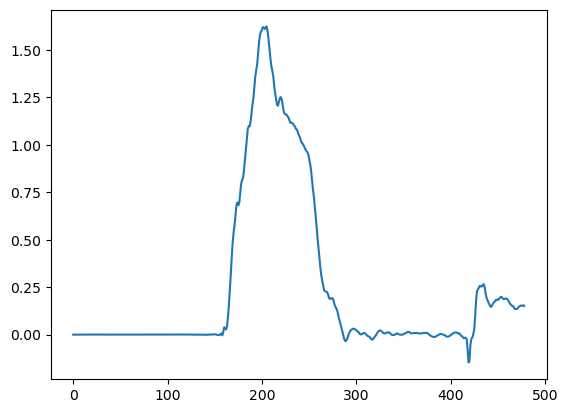

In [15]:
# And let's plot it

df["Velocity z (m/s)"].plot()

<Axes: >

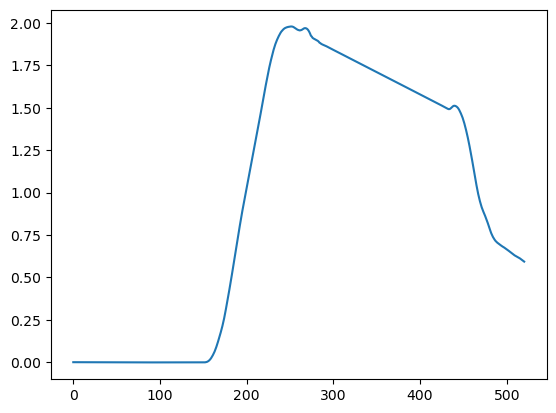

In [20]:
# Finally, we can numerically integrate *again* to find the position!
# Let's make a new column for the z position
# Again, we multiply .cumsum times the timestep, dt

# z position:

df["Position z (m)"] = df["Velocity z (m/s)"].cumsum()*dt

# And let's plot it

df["Position z (m)"].plot()

In [ ]:
# What is the final height? How would you find it?

# We can average the ending value (similar to how we did the baseline)

In [21]:
height = df["Position z (m)"].iloc[300:400].mean()
height

1.7119438555603284

In [100]:
# What axis do we want to use, x, y, or z?

In [ ]:
# Ok, now you try it!

In [102]:
# Challenge 1: Using what you learned in Datacamp, make your plots easier to read

# Add a title
# Add an annotation for the final height
# Change the line color and line style

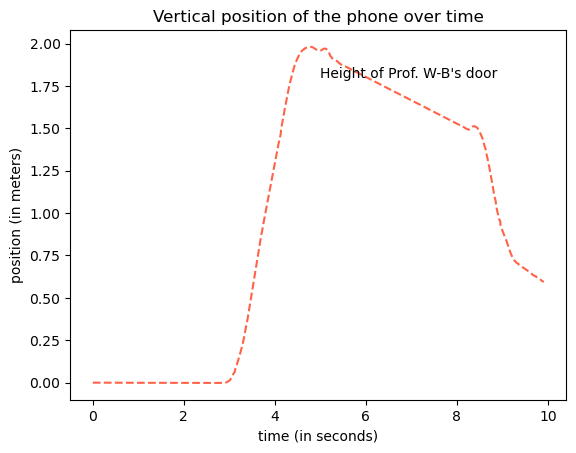

In [26]:
plt.plot(df.time, df['Position z (m)'], linestyle='--', color="tomato")

plt.xlabel("time (in seconds)")
plt.ylabel("position (in meters)")
plt.title("Vertical position of the phone over time")
plt.text(5, 1.8,"Height of Prof. W-B's door")

plt.show()

In [101]:
# Challenge 2: Measure the height of different objects in the room

In [ ]:
# Challenge 2b: Measure the height of an object in the room, but this time using either
# the g-force meter (Physics Toolbox) or Acceleration with g (PhyPhox)
# How is it different?

In [ ]:
# Challenge 3: Look at the other axes (x and y) -- what is going on with them?

# Ploting the x, y, and z displacements on one plot

In [ ]:
# Challenge 4a: With your group, start working on the group project

# Measure the height of one of your teammates with *all* group members' phones

In [ ]:
# Challenge 4b: With your group start discussing what *other* sensor you will use
# Or what *other* experiment you can do with the linear accelerometer

In [28]:
# df[["Position y (m)","Position x (m)", "Position z (m)"]].plot()